In [37]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

# Load raw data (example: CSV file)
raw_data = pd.read_csv("global_trade_data.csv")

In [26]:
raw_data.head()

,shipment_id,shipment_date,shipment_delay,cost_per_unit,origin_country,destination_country,status
0,SHP001,2022-01-01,3,150,USA,China,Delivered
1,SHP002,2022-01-02,5,200,USA,Germany,In Transit
2,SHP003,2022-01-03,7,180,China,USA,Delivered
3,SHP004,2022-01-04,2,160,Germany,USA,Delivered
4,SHP005,2022-01-05,8,220,India,USA,Delayed


In [27]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   shipment_id          25 non-null     object
 1   shipment_date        25 non-null     object
 2   shipment_delay       25 non-null     int64 
 3   cost_per_unit        25 non-null     int64 
 4   origin_country       25 non-null     object
 5   destination_country  25 non-null     object
 6   status               25 non-null     object
dtypes: int64(2), object(5)
memory usage: 1.5+ KB


In [28]:
raw_data.query

<bound method DataFrame.query of    shipment_id shipment_date  shipment_delay  cost_per_unit origin_country  \
0       SHP001    2022-01-01               3            150            USA   
1       SHP002    2022-01-02               5            200            USA   
2       SHP003    2022-01-03               7            180          China   
3       SHP004    2022-01-04               2            160        Germany   
4       SHP005    2022-01-05               8            220          India   
5       SHP006    2022-01-06               4            170            USA   
6       SHP007    2022-01-07               6            190          China   
7       SHP008    2022-01-08              10            250        Germany   
8       SHP009    2022-01-09               3            140            USA   
9       SHP010    2022-01-10               5            180             UK   
10      SHP011    2022-01-11               7            200          China   
11      SHP012    2022-01-12   

In [29]:
raw_data.describe()

,shipment_delay,cost_per_unit
count,25.00000,25.000000
mean,5.52000,184.800000
std,2.55147,34.292856
min,2.00000,140.000000
25%,3.00000,160.000000
50%,5.00000,180.000000
75%,7.00000,200.000000
max,10.00000,250.000000


In [30]:
raw_data.isna().sum()

shipment_id            0
shipment_date          0
shipment_delay         0
cost_per_unit          0
origin_country         0
destination_country    0
status                 0
dtype: int64

                shipment_delay  cost_per_unit
shipment_delay        1.000000       0.946506
cost_per_unit         0.946506       1.000000


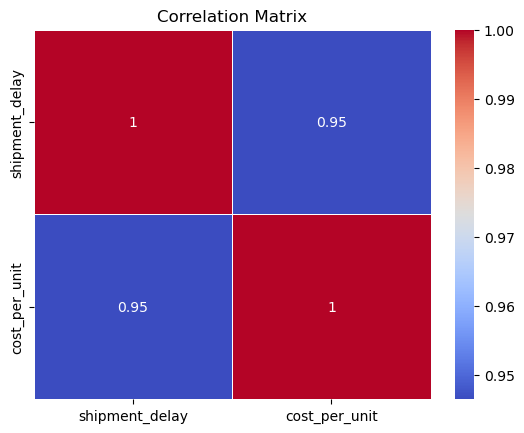

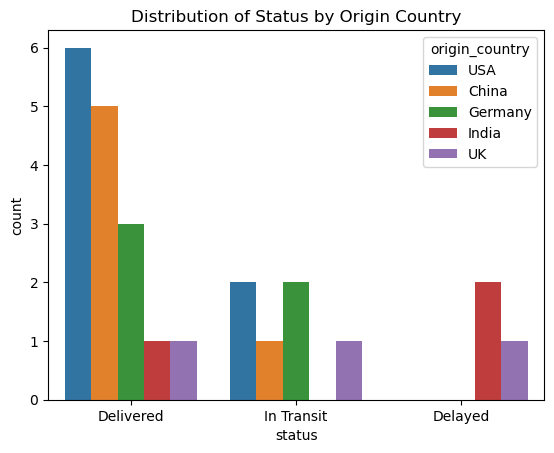

In [39]:
# Filter data for 2022-2023
filtered_data = raw_data[(raw_data['shipment_date'] >= '2022-01-01') & (raw_data['shipment_date'] <= '2023-12-31')]

# Calculate correlations
correlation_matrix = filtered_data[['shipment_delay', 'cost_per_unit']].corr()

# Print correlation matrix
print(correlation_matrix)

# Visualize correlations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Categorical analysis
sns.countplot(x='status', hue='origin_country', data=filtered_data)
plt.title('Distribution of Status by Origin Country')
plt.show()

In [41]:
# Convert shipment_date column to datetime format
raw_data['shipment_date'] = pd.to_datetime(raw_data['shipment_date'])

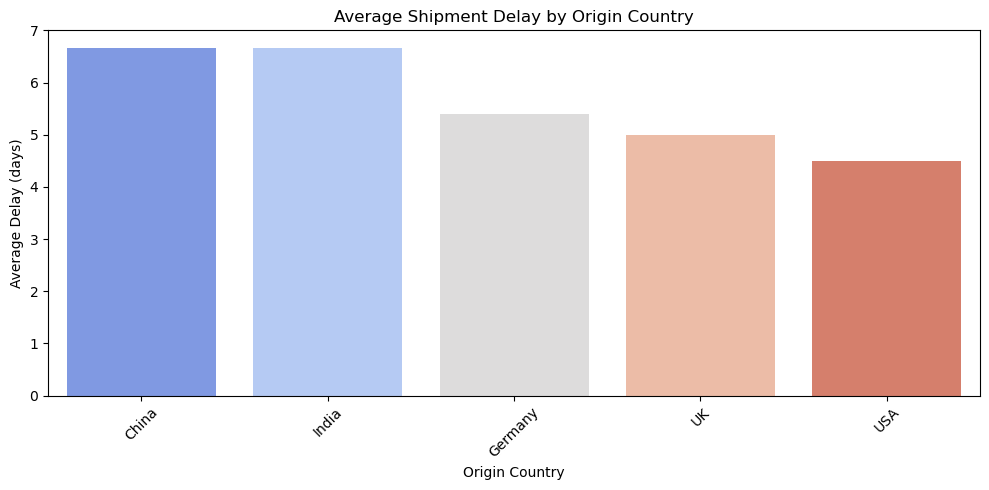

In [45]:
# Prepare the data as a DataFrame for seaborn
avg_delay_origin_df = avg_delay_origin.reset_index()
avg_delay_origin_df.columns = ['origin_country', 'average_delay']

# Plot using hue and suppress legend
plt.figure(figsize=(10, 5))
sns.barplot(data=avg_delay_origin_df,
            x='origin_country',
            y='average_delay',
            hue='origin_country',     # Explicitly assign hue
            palette='coolwarm',
            legend=False)             # Suppress legend
plt.title("Average Shipment Delay by Origin Country")
plt.ylabel("Average Delay (days)")
plt.xlabel("Origin Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [47]:
# Convert date column to datetime
raw_data['shipment_date'] = pd.to_datetime(raw_data['shipment_date'])

# Check for missing values
missing_data = raw_data.isnull().sum()
print("Missing values:\n", missing_data)

# Drop rows with missing critical info (or handle appropriately)
raw_data.dropna(subset=['shipment_delay', 'shipment_date', 'origin_country', 'destination_country'], inplace=True)


Missing values:
 shipment_id            0
shipment_date          0
shipment_delay         0
cost_per_unit          0
origin_country         0
destination_country    0
status                 0
dtype: int64


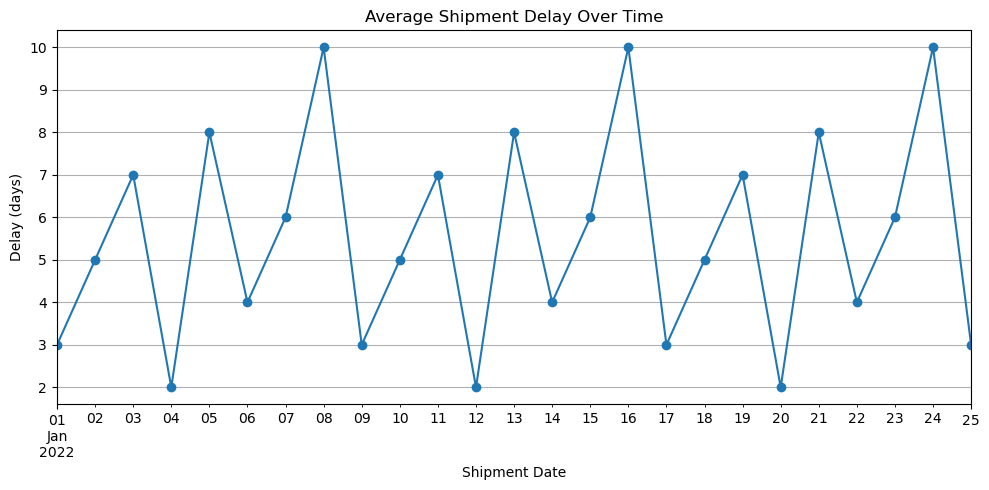

In [51]:
# Group by date
delay_trend = raw_data.groupby('shipment_date')['shipment_delay'].mean()

# Line plot
plt.figure(figsize=(10, 5))
delay_trend.plot(marker='o', linestyle='-')
plt.title("Average Shipment Delay Over Time")
plt.ylabel("Delay (days)")
plt.xlabel("Shipment Date")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\akee\AppData\Local\Temp\ipykernel_11568\1037956205.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=raw_data, x='status', y='shipment_delay', palette='Set2')


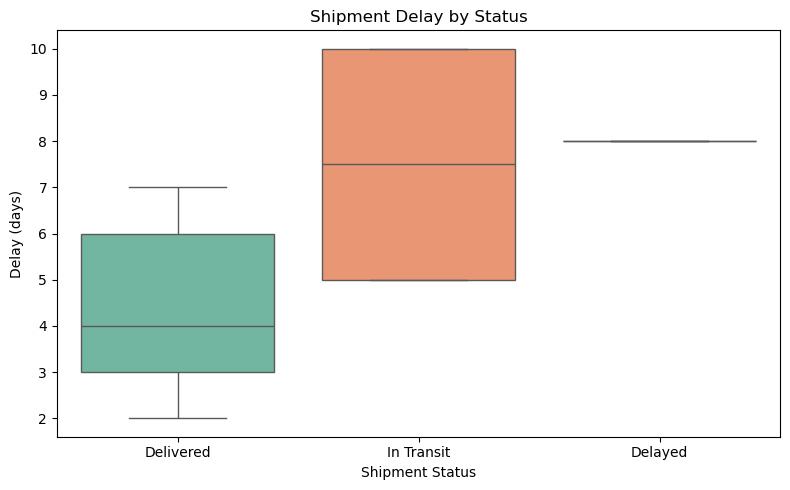

In [53]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=raw_data, x='status', y='shipment_delay', palette='Set2')
plt.title("Shipment Delay by Status")
plt.ylabel("Delay (days)")
plt.xlabel("Shipment Status")
plt.tight_layout()
plt.show()
